## Naïve Bayes Classification
**Naïve Bayes Classification can be used to design predictors that, after learning from a given training data set, can estimate the class label of a test data set using conditional probabilities. For a demonstration, let's use a small set of customer data of an electronics retailer.**

In [1]:
from pandas import DataFrame
from sklearn.naive_bayes import GaussianNB
from seaborn import countplot

In [2]:
data = DataFrame({'Age':['youth','youth','middle aged','senior','senior','senior','middle aged','youth','youth','senior','youth'],
                     'Income':['high','high','high','medium','low','low','low','medium','low','medium','medium'],
                     'Student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes'],
                     'Credit Rating':['fair','excellent','fair','fair','fair','excellent','excellent','poor','fair','fair','poor'],
                     'Will they buy a computer?':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes']})
data

,Age,Income,Student,Credit Rating,Will they buy a computer?
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle aged,low,yes,excellent,yes
7,youth,medium,no,poor,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


**I have considered attributes of the customers such as age, income, whether or not they're a student and their credit rating as factors that influence whether or not they will buy a computer**

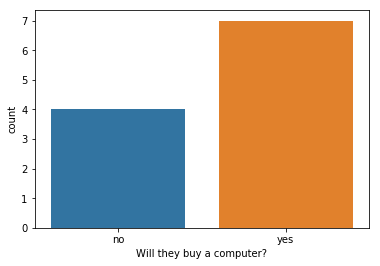

In [3]:
countplot(x = 'Will they buy a computer?',data = data)

**Graphical visualisation of how many people bought a computer and how many didn't among the customers that have visited in the past**

In [4]:
ageMap = {'youth':0,'middle aged':1,'senior':2}
incomeMap = {'low':0,'medium':1,'high':2}
studentMap = {'no':0,'yes':1}
creditMap = {'excellent':2,'fair':1,'poor':0}
buyMap = {'no':0,'yes':1}

**Since data in the given data set is ordinal (can be ranked such as low and high income) and categorical (student with yes or no values), we must convert them into meaningful values to train the classifier on. Hence we map them accordingly. Here, low income is represented by 0, medium by 1 and high by 2 and similarly other attributes are also meaningfully mapped**

In [5]:
data['Age'] = data['Age'].map(ageMap)
data['Income'] = data['Income'].map(incomeMap)
data['Student'] = data['Student'].map(studentMap)
data['Credit Rating'] = data['Credit Rating'].map(creditMap)
data['Will they buy a computer?'] = data['Will they buy a computer?'].map(buyMap)
data

,Age,Income,Student,Credit Rating,Will they buy a computer?
0,0,2,0,1,0
1,0,2,0,2,0
2,1,2,0,1,1
3,2,1,0,1,1
4,2,0,1,1,1
5,2,0,1,2,0
6,1,0,1,2,1
7,0,1,0,0,0
8,0,0,1,1,1
9,2,1,1,1,1


**The training data set is now in a form that the algorithm can use to build a classifier**



**Now we can use this data set to build a classifier. For the given data set, we can use the Gaussian Naïve Bayes Classifier from Python's Scikit-Learn package**

In [6]:
features = ['Age','Income','Student','Credit Rating']
inputs = data[features]
target = data['Will they buy a computer?']
gnb = GaussianNB()
predictor = gnb.fit(inputs,target)

**The attributes and the target class are extracted from the data set and a Naïve Bayes probabilistic model is fitted to this data set**

In [7]:
def get_output(arr):
    val = predictor.predict([[ageMap[arr[0]],incomeMap[arr[1]],studentMap[arr[2]],creditMap[arr[3]]]])[0]
    if(val == 1):
        print('Given person is likely to buy a computer')
    else:
        print('Given person is unlikely to buy a computer')

**Now the prepared model can be tested against new customer inputs to predicts whether or not they'll buy a computer**

In [8]:
get_output(['middle aged','medium','no','excellent'])

Given person is unlikely to buy a computer


In [9]:
get_output(['youth','high','yes','fair'])

Given person is likely to buy a computer
